In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

NUM_SIMS = 5
CONVERGED = False
USE_SIMULATED_TIME = False
MINUTE = 60

if USE_SIMULATED_TIME:
    X_LABEL = "Simulated time, minutes"
else:
    X_LABEL = "Time step number"

data_m = {
    r"Coldstart M": load_data("poro_coldstart_m", n_newest=NUM_SIMS),
    r"Warmstart M(S)": load_data("poro_warmstart_m_s", n_newest=NUM_SIMS),
}

data_l = {
    r"Coldstart L": load_data("poro_coldstart_l", n_newest=NUM_SIMS),
    r"Warmstart L(S)": load_data("poro_warmstart_l_s", n_newest=NUM_SIMS),
    r"Warmstart L(M)": load_data("poro_warmstart_l_m", n_newest=NUM_SIMS),
    r"Warmstart L(S,M)": load_data("poro_warmstart_l_sm", n_newest=NUM_SIMS),
}

# data = data_m
data = data_l


save_media_path = None

Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_coldstart_m_11.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_coldstart_m_12.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_coldstart_m_13.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_coldstart_m_14.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_coldstart_m_15.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_warmstart_m_s_11.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_warmstart_m_s_12.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_warmstart_m_s_13.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/2/performance/poro_warmstart_m_s_14.npy
/home/fire

Coldstart L 199.5398581981659 4.657413959503174
Warmstart L(S) 201.20640616416932 4.136520147323608
Warmstart L(M) 199.7601544380188 2.5429623126983643
Warmstart L(S,M) 199.45596895217895 3.2744386196136475


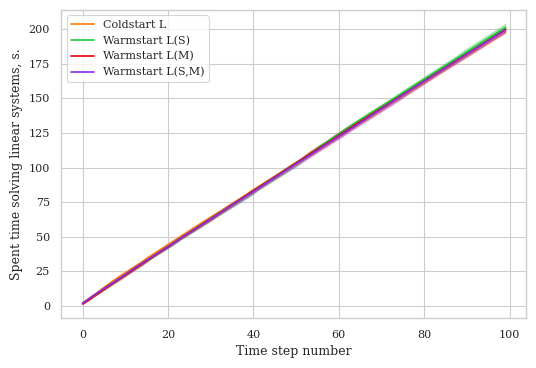

In [8]:
color_iter = 0
best_time = float("inf")
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        res = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )

        results.append(res)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / MINUTE)
        else:
            times.append(np.arange(len(res)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    if mean[-1] < best_time:
        best_time = mean[-1]
        best = mean
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

Cold start L & $199.54 \pm 4.66$\\
Warm start L(S) & $201.21 \pm 4.14$\\
Warm start L(M) & $199.76 \pm 2.54$\\
Warm start L(S,M) & $199.46 \pm 3.27$\\

Coldstart L 199.5398581981659 4.657413959503174
Warmstart L(S) 201.20640616416932 4.136520147323608
Warmstart L(M) 199.7601544380188 2.5429623126983643
Warmstart L(S,M) 199.45596895217895 3.2744386196136475


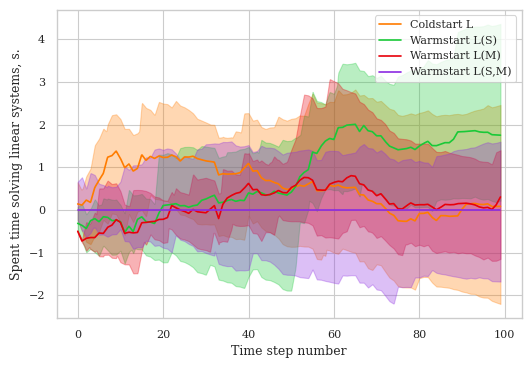

In [9]:
color_iter = 0
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        res = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )

        results.append(res)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / MINUTE)
        else:
            times.append(np.arange(len(res)))


    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list) - best
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")